In [115]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [125]:

class ColorSpace():
    def __init__(self):
        self.pixel_value = 0
        self.color_value = 0

def region_coloring(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #tmp_img = np.zeros_like(gray_img, dtype=ColorSpace)
    tmp_img = [[ColorSpace() for i in range(img.shape[1])] for j in range(img.shape[0])]
    tmp_img = np.array(tmp_img)
    
    for i in range(tmp_img.shape[0]):
        for j in range(tmp_img.shape[1]):
            if gray_img[i,j] != 0:
                tmp_img[i,j].pixel_value = 1
                tmp_img[i,j].color_value = 0
                
    uniqe_color_iterator = 1
    iter = 0
    while True:
        flag_changed_color = False
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if i > 0 and j > 0 and i < img.shape[0]-1 and j < img.shape[1]-1:
                    if tmp_img[i,j].pixel_value == 1:
                        mask = np.array([tmp_img[i-1,j-1], tmp_img[i-1, j], tmp_img[i-1, j+1], tmp_img[i, j-1], tmp_img[i, j+1], tmp_img[i+1, j-1], tmp_img[i+1, j], tmp_img[i+1, j+1]])
                    
                        #get non black pixels from mask
                        color = [x.color_value for x in mask if x.pixel_value == 1 and x.color_value != 0]
                    
                        #if there is no non black pixel in mask
                        if len(color) == 0 and tmp_img[i,j].pixel_value == 1:
                            tmp_img[i,j].color_value = uniqe_color_iterator
                            uniqe_color_iterator += 1
                            flag_changed_color = True
                        elif tmp_img[i,j].pixel_value == 1 and min(color) != tmp_img[i,j].color_value:
                            tmp_img[i,j].color_value = min(color)
                            flag_changed_color = True
        iter += 1   
        if flag_changed_color == False or iter > 20:
            print("iter: ", iter)
            break
        
        
        
    final_img = np.zeros_like(gray_img, dtype=np.uint8)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if tmp_img[i,j].pixel_value == 1:
                color = tmp_img[i,j].color_value
                final_img[i,j] = color
    print(np.unique(final_img))
    return final_img
        

def image_color_segmentation(img, threshold):
    # extract the color channels
    img = img.astype(np.float32)
    R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
    background = ((G*255)/(R+G+B)) 
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if background[i,j] >= threshold:
                img[i,j] = [0,0,0]
                
    return img.astype(np.uint8)




iter:  9
[ 0  1  7 18 24 30]


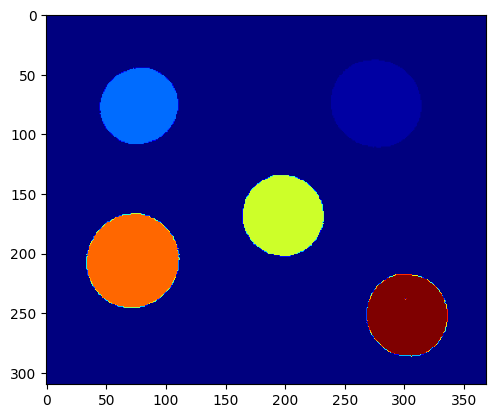

In [126]:
cv07_coins = cv2.imread('cv07_segmentace.bmp')
img = image_color_segmentation(cv07_coins,105)
#plt.imshow(img)
color_image = region_coloring(img)
plt.imshow(color_image, cmap='jet')

Center of mass for region 0: (183.92, 154.00)
Center of mass for region 1: (276.41, 74.47)
Center of mass for region 7: (77.57, 76.56)
Center of mass for region 18: (198.36, 168.32)
Center of mass for region 24: (72.26, 206.27)
Center of mass for region 30: (302.43, 251.69)


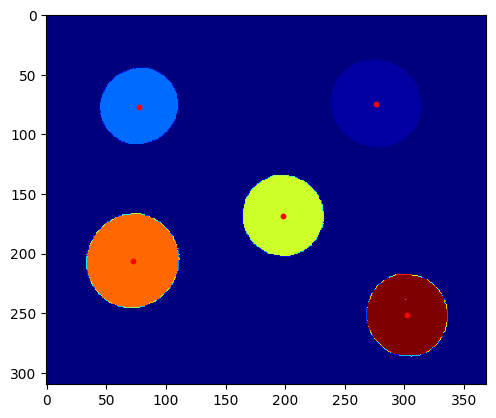

In [118]:
# calculate center of mass for each region
centers = []
for i in np.unique(color_image):
    mask = (color_image == i)
    y, x = np.where(mask)
    print('Center of mass for region {}: ({:.2f}, {:.2f})'.format(i, np.mean(x), np.mean(y)))
    if i != 0:
        centers.append((np.mean(x), np.mean(y)))
    
# plot the center of mass
plt.imshow(color_image, cmap='jet')
plt.scatter([x for x, y in centers], [y for x, y in centers], c='r', s=10)

In [119]:
# calculate pixel count for each region and set value for each region 5 crowns is 4000 pixels

coins_value = []
for j,region_num in enumerate(np.unique(color_image)):
    if region_num != 0:
        mask = (color_image == region_num)
        pixel_count = np.sum(mask)
        print('Center of mass for region {}: ({:.2f}, {:.2f})'.format(region_num, centers[j-1][0], centers[j-1][1]))
        if pixel_count >= 4000:
            coins_value.append(5)
        else:
            coins_value.append(1)
        print('Pixel count for region {}: {}, coin value: {}'.format(region_num, pixel_count, coins_value[j-1]))

print('='*50)        
print('Total value of coins: {}'.format(np.sum(coins_value)))

Center of mass for region 1: (276.41, 74.47)
Pixel count for region 1: 4386, coin value: 5
Center of mass for region 7: (77.57, 76.56)
Pixel count for region 7: 3298, coin value: 1
Center of mass for region 18: (198.36, 168.32)
Pixel count for region 18: 3621, coin value: 1
Center of mass for region 24: (72.26, 206.27)
Pixel count for region 24: 4782, coin value: 5
Center of mass for region 30: (302.43, 251.69)
Pixel count for region 30: 3678, coin value: 1
Total value of coins: 13
